<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!



# PASO 1 Obtención de datos

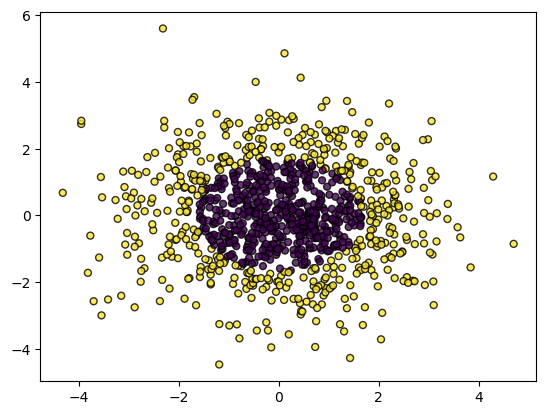

In [23]:
#create two gaussian distributions using make_gaussian_quantiles

from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
import numpy as np

#generate 2D normally distributed data
X1, Y1 = make_gaussian_quantiles(cov=2.,
                                    n_samples=1000, n_features=2,
                                    n_classes=2, random_state=1)

# plot  data. Seaborn, blue a red color, transparency.

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k', alpha=0.8)
plt.show()

# PASO 2: Manipulación de datos


In [24]:
from sklearn.model_selection import train_test_split

# Dividir entre entrenamiento+validación y prueba (80% - 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Dividir el conjunto entrenamiento+validación en entrenamiento y validación (60% - 20%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Verificamos tamaños
print(f'Tamaño entrenamiento: {X_train.shape[0]}')
print(f'Tamaño validación: {X_val.shape[0]}')
print(f'Tamaño prueba: {X_test.shape[0]}')


Tamaño entrenamiento: 600
Tamaño validación: 200
Tamaño prueba: 200


# PASO 3: Exploración de Datos

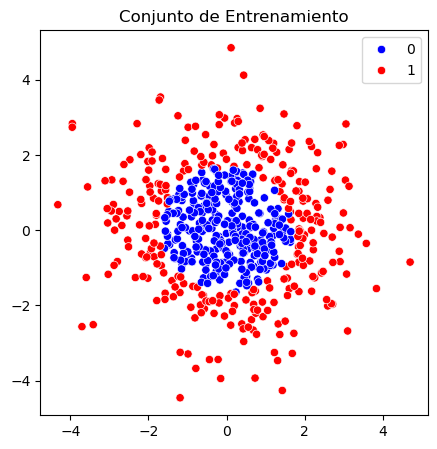

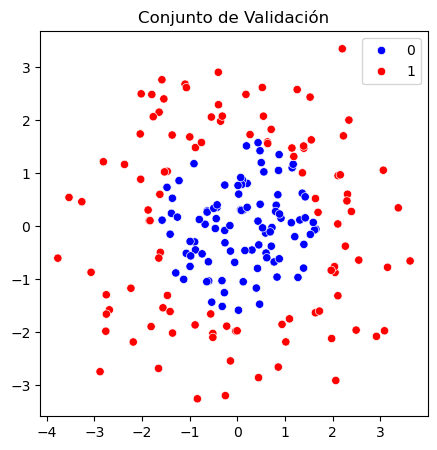

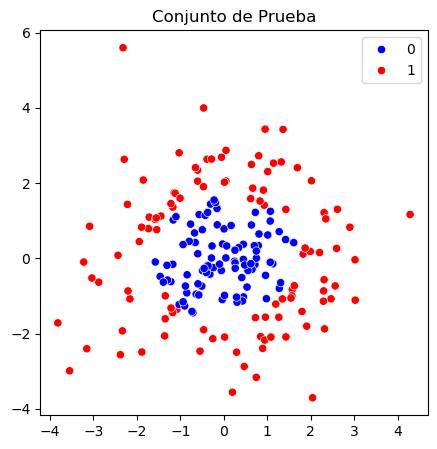

In [25]:
import seaborn as sns

# Entrenamiento
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=y_train, palette=['blue', 'red'])
plt.title("Conjunto de Entrenamiento")
plt.show()

# Validación
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_val[:,0], y=X_val[:,1], hue=y_val, palette=['blue', 'red'])
plt.title("Conjunto de Validación")
plt.show()

# Prueba
plt.figure(figsize=(5, 5))
sns.scatterplot(x=X_test[:,0], y=X_test[:,1], hue=y_test, palette=['blue', 'red'])
plt.title("Conjunto de Prueba")
plt.show()


# PASO 4: Modelamiento de Datos (Machine Learning)

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Entrenar con kernel RBF
clf = SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X_train, y_train)

# Evaluar en el conjunto de validación
y_val_pred = clf.predict(X_val)

print("Reporte en Validación:")
print(classification_report(y_val, y_val_pred))

# Evaluar en el conjunto de prueba
y_test_pred = clf.predict(X_test)

print("Reporte en Prueba:")
print(classification_report(y_test, y_test_pred))


Reporte en Validación:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        96
           1       0.96      0.97      0.97       104

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Reporte en Prueba:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        94
           1       0.96      0.98      0.97       106

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



In [27]:
clf2 = SVC(kernel='rbf', gamma=0.1, C=10)
clf2.fit(X_train, y_train)

# Evaluar en el conjunto de validación
y_val_pred = clf2.predict(X_val)

print("Reporte en Validación:")
print(classification_report(y_val, y_val_pred))

# Evaluar en el conjunto de prueba
y_test_pred = clf2.predict(X_test)

print("Reporte en Prueba:")
print(classification_report(y_test, y_test_pred))

Reporte en Validación:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        96
           1       0.98      0.96      0.97       104

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

Reporte en Prueba:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.96      0.96      0.96       106

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



# PASO 5: Interpretación de los Resultados

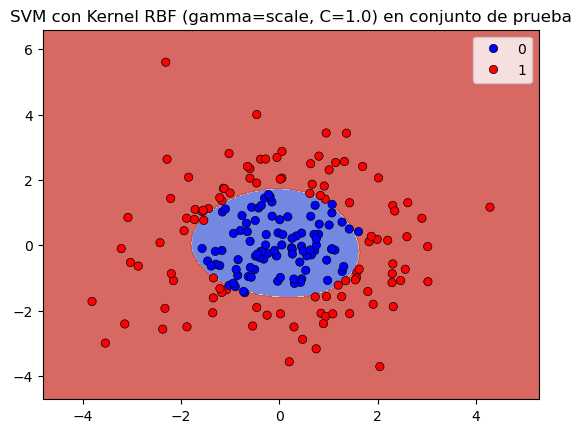

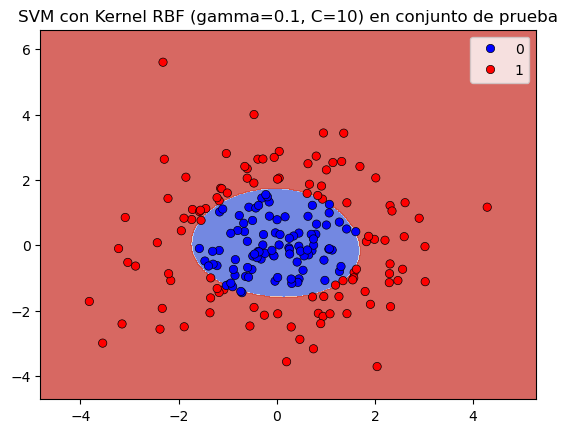

In [28]:
def plot_decision_boundary(clf, X, y, title="Frontera de decisión"):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=['blue', 'red'], edgecolor='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(clf, X_test, y_test, title="SVM con Kernel RBF (gamma=scale, C=1.0) en conjunto de prueba")
plot_decision_boundary(clf2, X_test, y_test, title="SVM con Kernel RBF (gamma=0.1, C=10) en conjunto de prueba")



### 1. Desempeño del Modelo
Se entrenaron dos modelos SVM con kernel Gaussiano (RBF), utilizando distintos hiperparámetros:

- **Modelo 1**: `gamma='scale'`, `C=1.0` (valores por defecto).
- **Modelo 2**: `gamma=0.1`, `C=10` (ajuste manual).

**Resultados:**

| Métrica       | Validación (Modelo 1) | Validación (Modelo 2) | Prueba (Modelo 1) | Prueba (Modelo 2) |
|---------------|------------------------|------------------------|-------------------|-------------------|
| Accuracy      | 0.96                   | 0.97                   | 0.97              | 0.96              |
| F1-score (0)  | 0.96                   | 0.97                   | 0.97              | 0.96              |
| F1-score (1)  | 0.97                   | 0.97                   | 0.97              | 0.96              |

- **Modelo 1** mostró un buen rendimiento, con una accuracy del 97% en el conjunto de prueba.
- **Modelo 2**, con gamma=0.1 y C=10, logró una ligera mejora en validación con 97% de accuracy, pero un rendimiento ligeramente inferior en el conjunto de prueba con un 96%, lo que indica una posible leve sobreajuste al conjunto de validación.


### 2. Frontera de Decisión
Las gráficas de frontera de decisión muestran que:

- Ambos modelos lograron una separación clara entre las dos clases con estructura concéntrica.
- La forma curva de la frontera confirma que el kernel RBF permite capturar relaciones no lineales entre las clases, algo que un SVM lineal no podría lograr.


### 3. Parámetros ajustados

- **C (penalización por error):** Un valor más alto de C, como en este 10, reduce la tolerancia a errores, intentando clasificar correctamente todos los puntos, lo que puede hacer que el modelo se sobreajuste.
- **gamma:** Controla la influencia de cada punto de entrenamiento. Un valor de gamma bajo genera fronteras más suaves, y un valor alto puede producir fronteras muy complejas y sensibles al ruido.

En este caso, los valores gamma=0.1 y C=10 lograron un buen equilibrio, aunque no superaron ampliamente el rendimiento del modelo por defecto en el conjunto de prueba, ya que los valores de las métricas varian en un 1%.


### 4. Conclusiones

- El SVM con kernel RBF fue muy eficaz para clasificar datos con clases no linealmente separables ya que ambos modelos llegan a 97% y 96% en accuracy en conjunto de pruebas.
- Aunque el ajuste manual de hiperparámetros puede mejorar el desempeño en validación, no garantiza una mejora en generalización.
- La separación entre los conjuntos de entrenamiento, validación y prueba permitió una evaluación objetiva y robusta.
- Este experimento demuestra la importancia de la validación para el ajuste de modelos y de reservar el conjunto de prueba solo para la evaluación final.
